In [51]:
from PyEMD import EMD, EEMD
import numpy  as np
import pylab as plt
import mne
from mne.datasets.brainstorm import bst_raw
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as sio


import pandas as pd
import scipy.io as sio
from scipy.io import savemat, loadmat
# Define signal
t = np.linspace(0, 1, 200)
s = np.cos(11*2*np.pi*t*t) + 6*t*t



In [12]:
FOLDERPATH = r'E:\PhD\EEG_data\Pareidolia_BIDS'
FREQ_BANDS = [[1, 3], [3, 7], [7, 12], [12, 20],[20, 30], [30, 45], [45, 60]]
FREQ_NAMES = ['delta', 'theta', 'alpha', 'low-beta', 'high-beta', 'gamma1', 'gamma2']
RUN_LIST = {'pareidolia':['1', '2', '3', '4']}
SUBJ_LIST = ['01']
TASK_LIST = ['pareidolia']
frontal_L = ['E20', 'E21', 'E22', 'E23', 'E24', 'E26', 'E27', 'E12', 'E18', 'E19', 'E11', 'E15', 'E16']
frontal_R = ['E2', 'E3', 'E4', 'E5', 'E118', 'E124', 'E123', 'E9', 'E10', 'E14', 'E11', 'E15', 'E16']
frontal_LR = frontal_L+frontal_R
occi_R = ['E76', 'E83', 'E84']
occi_L = ['E66', 'E70', 'E71']
par = ['Image_on_par_high', 'Image_on_par_mid', 'Image_on_par_low']
nopar = ['Image_on_nopar_high', 'Image_on_nopar_mid', 'Image_on_nopar_low']

(200,)

0.08751082420349121


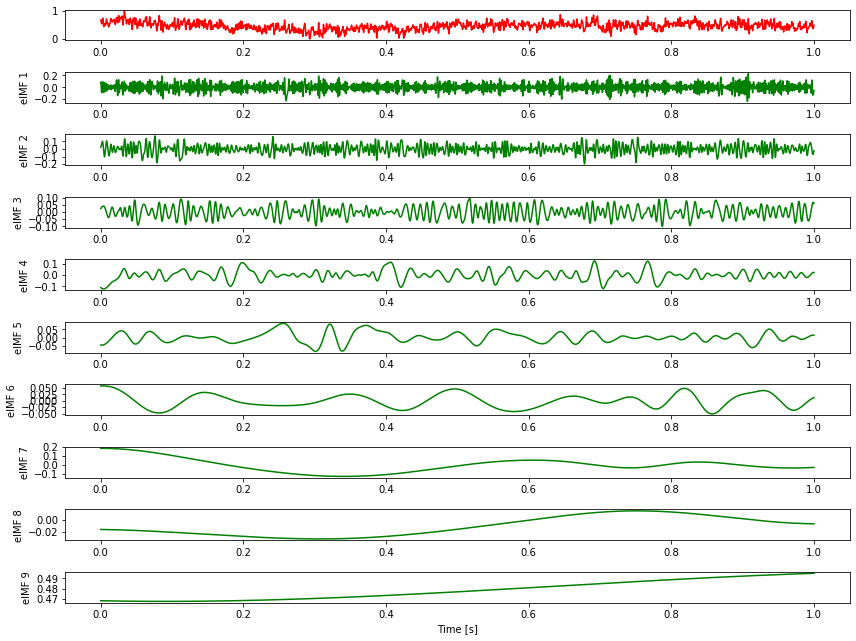

In [89]:
eemd = EEMD()
#s = np.random.random(1001)
S = s
t = np.linspace(0, 1, 4001)
# Say we want detect extrema using parabolic method
import time
start = time.time()
emd = eemd.EMD
emd.extrema_detection="parabol"
eIMFs = EMD().emd(s,t)
#eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]
stop = time.time()
print(stop-start)
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

6.4960715633998985e-06

In [81]:
epochs = mne.read_epochs('../../pareidolia_run4.fif')
epochs = epochs.apply_baseline((-1.5, -0.1))
epochs = epochs.crop(1, 5)
epochs_data = epochs.get_data()

Reading ../../pareidolia_run4.fif ...
    Found the data of interest:
        t =   -1500.00 ...    8000.00 ms
        0 CTF compensation matrices available


<ipython-input-81-c408605090b1>:1: RuntimeWarning: This filename (../../pareidolia_run4.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs('../../pareidolia_run4.fif')


Not setting metadata
Not setting metadata
84 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Applying baseline correction (mode: mean)


<ipython-input-81-c408605090b1>:3: RuntimeWarning: Cropping removes baseline period, setting epochs.baseline = None
  epochs = epochs.crop(1, 5)


In [82]:
condition = nopar
chs = frontal_R
evoked = epochs[condition].average(chs)
s = np.average(evoked.data, axis = 0)
s = np.interp(s, (s.min(), s.max()), (0, +1))

In [83]:
s.shape

(4001,)

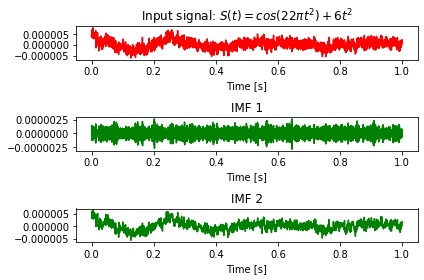

In [45]:

# Execute EMD on signal
IMF = EMD().emd(s,t)
N = IMF.shape[0]+1

# Plot results
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
plt.show()

In [47]:
IMF.shape

(2, 9501)